### The Dataset: Immigration to Canada from 1980 to 2013 <a id="2"></a>


Dataset Source: [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows).
In this lab, we will focus on the Canadian immigration data. <br><br>We have already **pre-processed** the data, we will use the **clean data** saved in the csv format for this lab.
The Canada Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>.

---


Next, we'll do is import two key data analysis modules: *pandas* and *numpy*


In [34]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [35]:
df_can = pd.read_csv('Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.


In [36]:
df_can.head()
# tip: You can specify the number of rows you'd like to see as follows: df_can.head(10)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [37]:
df_can.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

Let's set Country as the index, it will help you to plot the charts easily, by refering to the country names as index value


In [38]:
df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

In [39]:
#let's check
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [40]:
# optional: to remove the name of the index
df_can.index.name = None

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:


In [41]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


---
# Visualizing Data <a id="8"></a>


In [42]:
# we are using the inline backend
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

*optional: check if Matplotlib is loaded.


# Line Pots (Series/Dataframe) <a id="4"></a>


**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.


**Let's start with a case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a `Line` plot:

**Question:** Plot a line graph of immigration from Haiti using `df.plot()`.


First, we will extract the data series for Haiti.


In [43]:
#Since we converted the years to string,
#let's declare a variable that will allow us to easily call upon the full range of years:
years = list(map(str, range(1980, 2014)))
#creating data series
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

Next, we will plot a line plot by appending `.plot()` to the `haiti` dataframe.


*pandas* automatically populated the x-axis with the index values (years), and the y-axis with the column values (population). <br>

Also, let's label the x and y axis using `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` as follows:


## **Pandas**

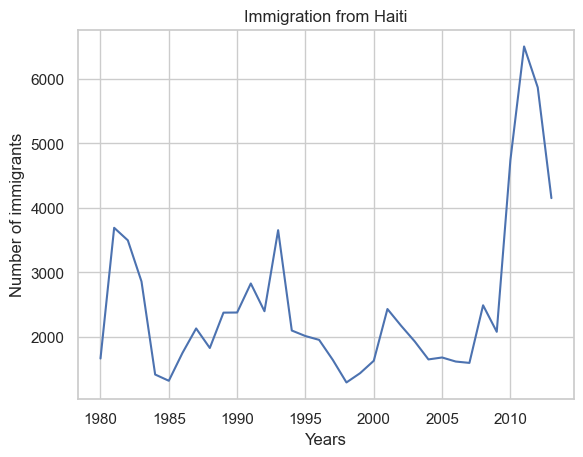

In [44]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

## **Matplotlib**


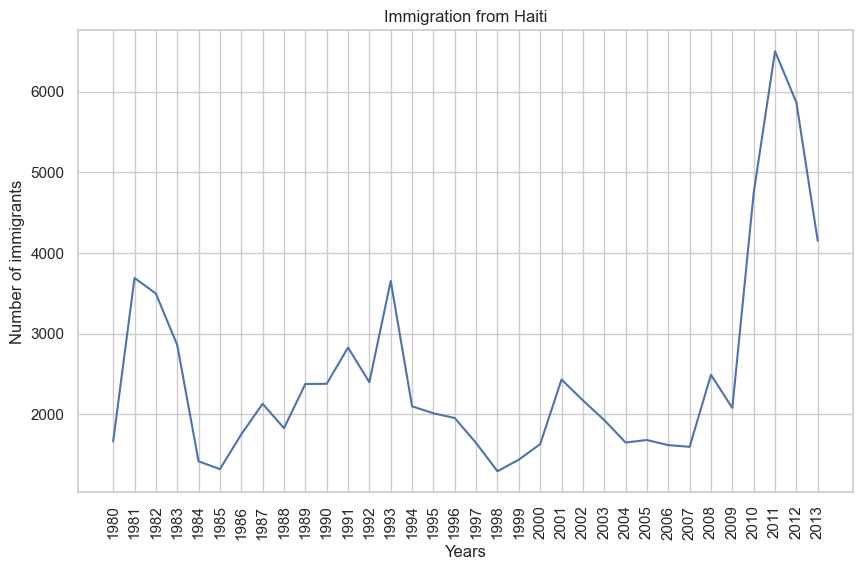

In [45]:
# Assuming 'haiti' is a DataFrame with your data
plt.figure(figsize=(10, 6))

# Create the line plot
plt.plot(haiti.index, haiti.values)

# Add titles and labels
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.xticks(rotation=90)
# Show the plot
plt.show()


## **Seaborn**

In [46]:
x=[10,20,30,40,50,60,70,80,90]
y = ['a','b','c','v','f','d','r','t','g']

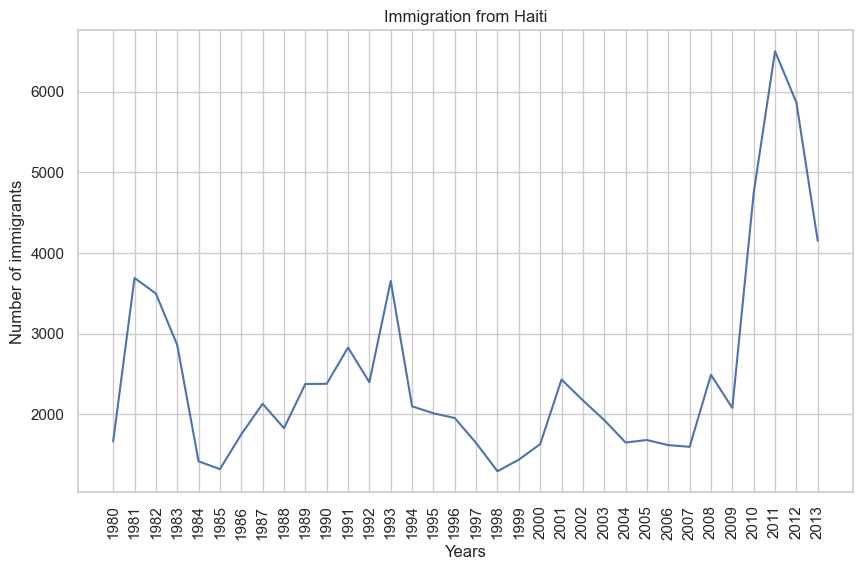

In [47]:
# Assuming 'haiti' is a DataFrame with your data
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=haiti)

# Add titles and labels
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.xticks(rotation=90)
# Show the plot
plt.show()


# Histograms<a id="8"></a>

A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.


**Question:** What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?


Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us **Numpy**'s `histrogram` method to get the bin ranges and frequency counts as follows:


In [48]:
# let's quickly view the 2013 data
df_can['2013'].head()

Afghanistan       2004
Albania            603
Algeria           4331
American Samoa       0
Andorra              1
Name: 2013, dtype: int64

In [49]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

*   178 countries contributed between 0 to 3412.9 immigrants
*   11 countries contributed between 3412.9 to 6825.8 immigrants
*   1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/Mod2Fig1-Histogram.jpg" align="center" width="800">


We can easily graph this distribution by passing `kind=hist` to `plot()`.


## **Pandas**

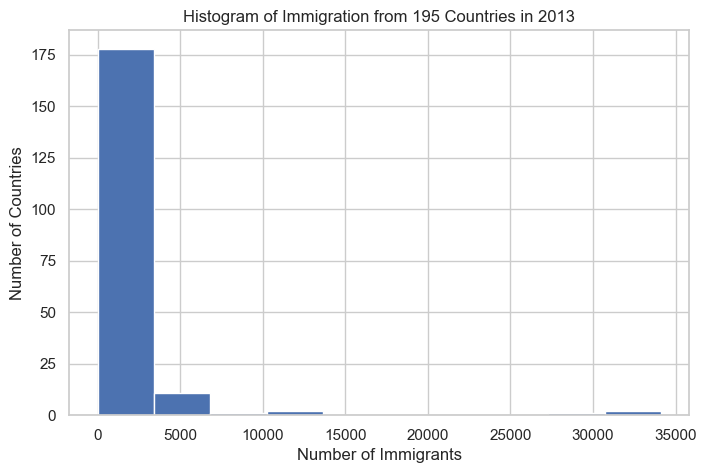

In [50]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population.

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a `xticks` keyword that contains the list of the bin sizes, as follows:


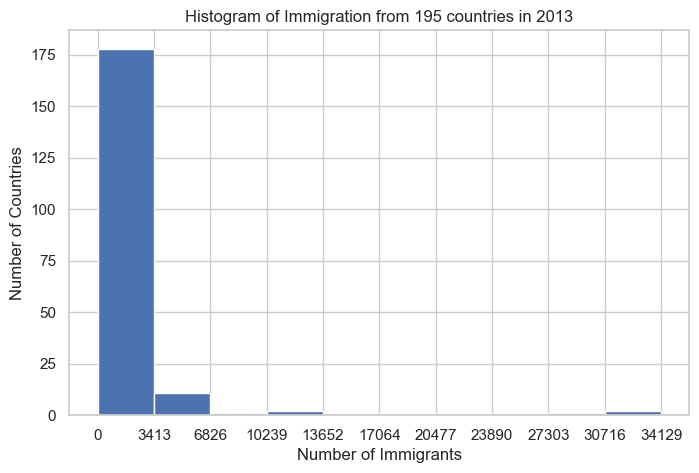

In [51]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

*Side Note:* We could use `df_can['2013'].plot.hist()`, instead. In fact, throughout this lesson, using `some_data.plot(kind='type_plot', ...)` is equivalent to `some_data.plot.type_plot(...)`. That is, passing the type of the plot as argument or method behaves the same.

See the *pandas* documentation for more info  [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).


## **Matplotlib**


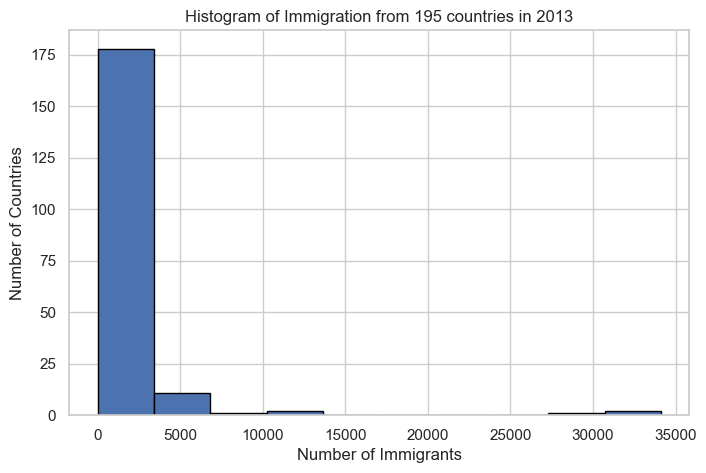

In [52]:
# Assuming 'df_can' is a DataFrame with your data
count, bin_edges = np.histogram(df_can['2013'])

plt.figure(figsize=(8, 5))

# Create the histogram
plt.hist(df_can['2013'], bins=bin_edges, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

# Show the plot
plt.show()

## **Seaborn**


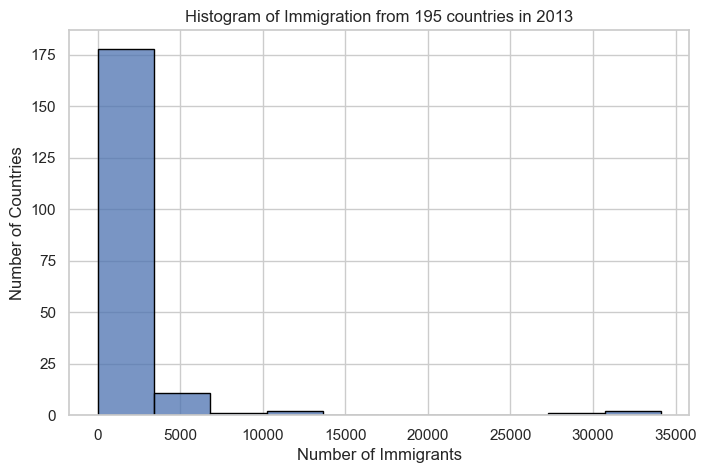

In [53]:
# Assuming 'df_can' is a DataFrame with your data
count, bin_edges = np.histogram(df_can['2013'])

# Set the style
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))

# Create the histogram
sns.histplot(df_can['2013'], bins=bin_edges, kde=False, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

# Show the plot
plt.show()

# Bar Charts (Dataframe) <a id="10"></a>

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

*   `kind=bar` creates a *vertical* bar plot
*   `kind=barh` creates a *horizontal* bar plot


**Vertical bar plot**

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particularly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.

**Let's start off by analyzing the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

**Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.


In [54]:
# step 1: get the data
#let's declare a variable that will allow us to easily call upon the full range of years:
years = list(map(str, range(1980, 2014)))
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

## **Pandas**


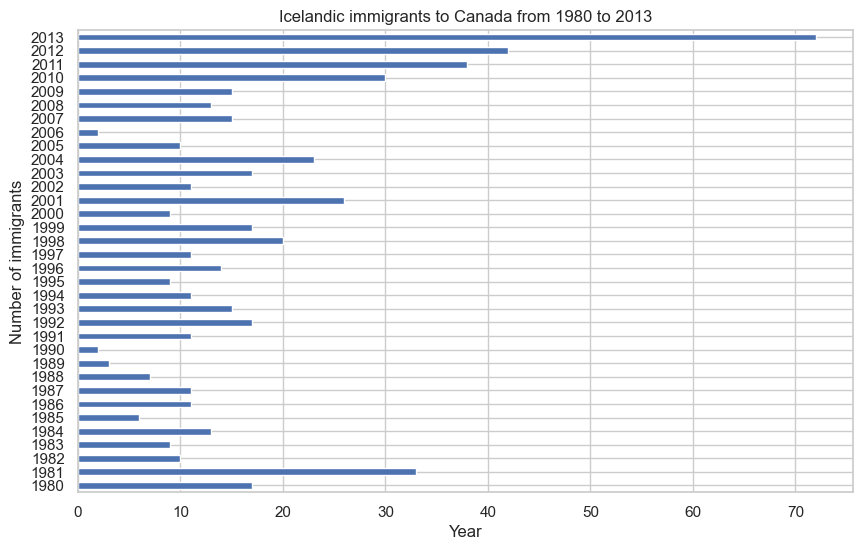

In [55]:
# step 2: plot data
df_iceland.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

## **Matplotlib**


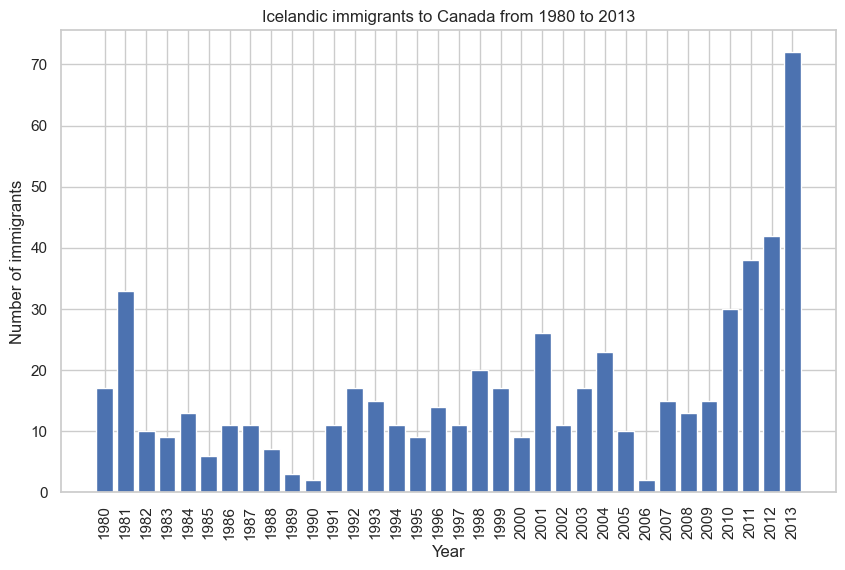

In [56]:
# Assuming 'df_iceland' is a DataFrame with your data
plt.figure(figsize=(10, 6))

# Create the bar plot
plt.bar(df_iceland.index, df_iceland.values)

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.xticks(rotation=90)
# Show the plot
plt.show()

## **Seaborn**


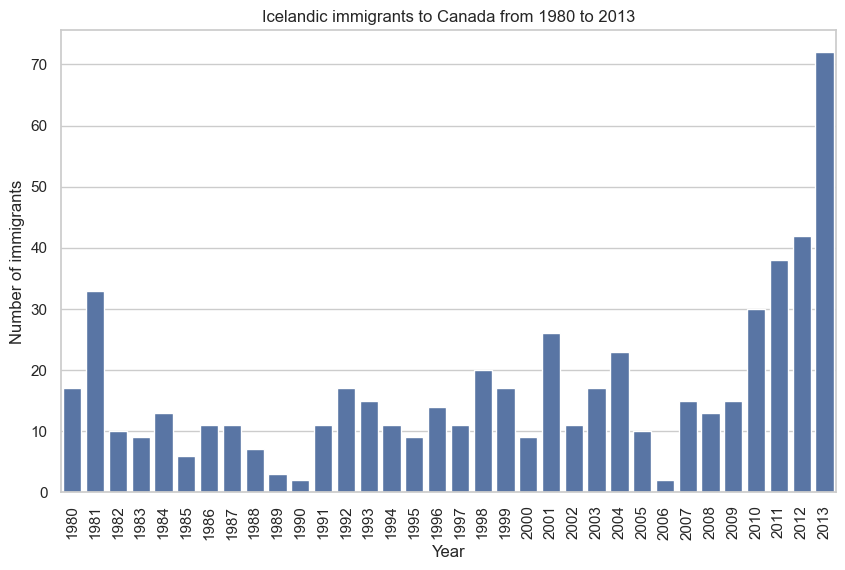

In [57]:
# Assuming 'df_iceland' is a DataFrame with your data
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x=df_iceland.index, y=df_iceland.values.flatten())

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.xticks(rotation=90)

# Show the plot
plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:

*   `s`: str, the text of annotation.
*   `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
*   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
*   `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
*   `arrowprops`: Takes a dictionary of properties to draw the arrow:
    *   `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    *   `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    *   `color`: Specifies color of arrow.
    *   `lw`: Specifies the line width.

I encourage you to read the Matplotlib documentation for more details on annotations:
<https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html>.


# Pie Charts <a id="6"></a>

A `pie chart` is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.


Step 1: Gather data.

We will use *pandas* `groupby` method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following steps:

1.  **Split:** Splitting the data into groups based on some criteria.
2.  **Apply:** Applying a function to each group independently:
    .sum()
    .count()
    .mean()
    .std()
    .aggregate()
    .apply()
    .etc..
3.  **Combine:** Combining the results into a data structure.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig4SplitApplyCombine.png" height="400" align="center">


In [58]:
# group countries by continents and apply sum() function
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object.
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


C:\Users\smart\AppData\Local\Temp\ipykernel_18868\1219081155.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continents = df_can.groupby('Continent', axis=0).sum()
C:\Users\smart\AppData\Local\Temp\ipykernel_18868\1219081155.py:6: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  print(type(df_can.groupby('Continent', axis=0)))


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Step 2: Plot the data. We will pass in `kind = 'pie'` keyword, along with the following additional parameters:

*   `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
*   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
*   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).


## **Pandas**


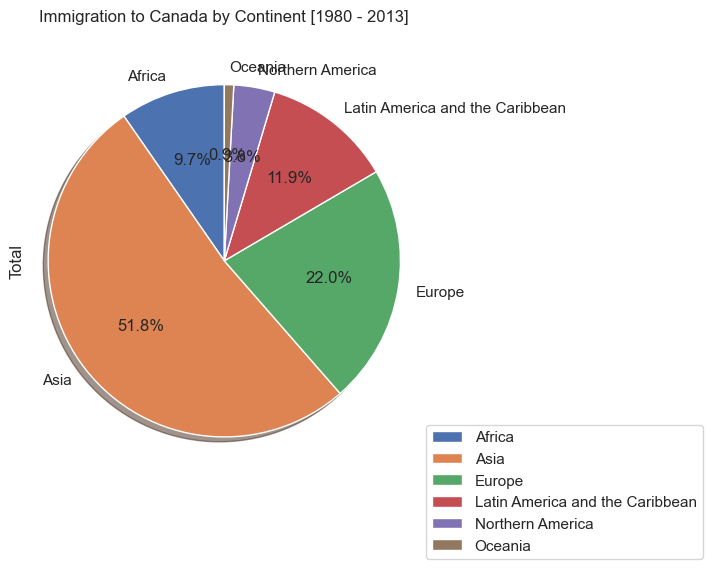

In [59]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.


plt.legend(labels=df_continents.index, loc='center left', bbox_to_anchor=(1, 0))
plt.show()

## **Matplotlib**


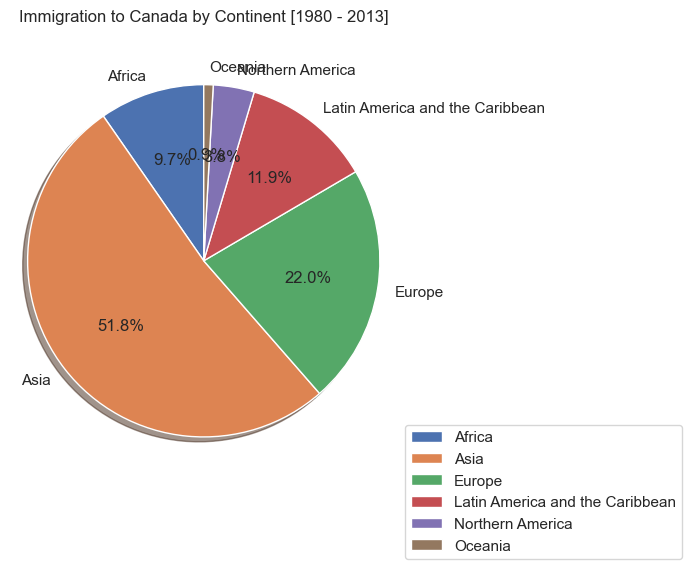

In [60]:
# Assuming df_continents is your DataFrame and 'Total' is the column you want to plot
sizes = df_continents['Total']
labels = df_continents.index

plt.figure(figsize=(5, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(labels=df_continents.index, loc='center left', bbox_to_anchor=(1, 0))
plt.show()

# Box Plots <a id="8"></a>

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width="440," align="center">


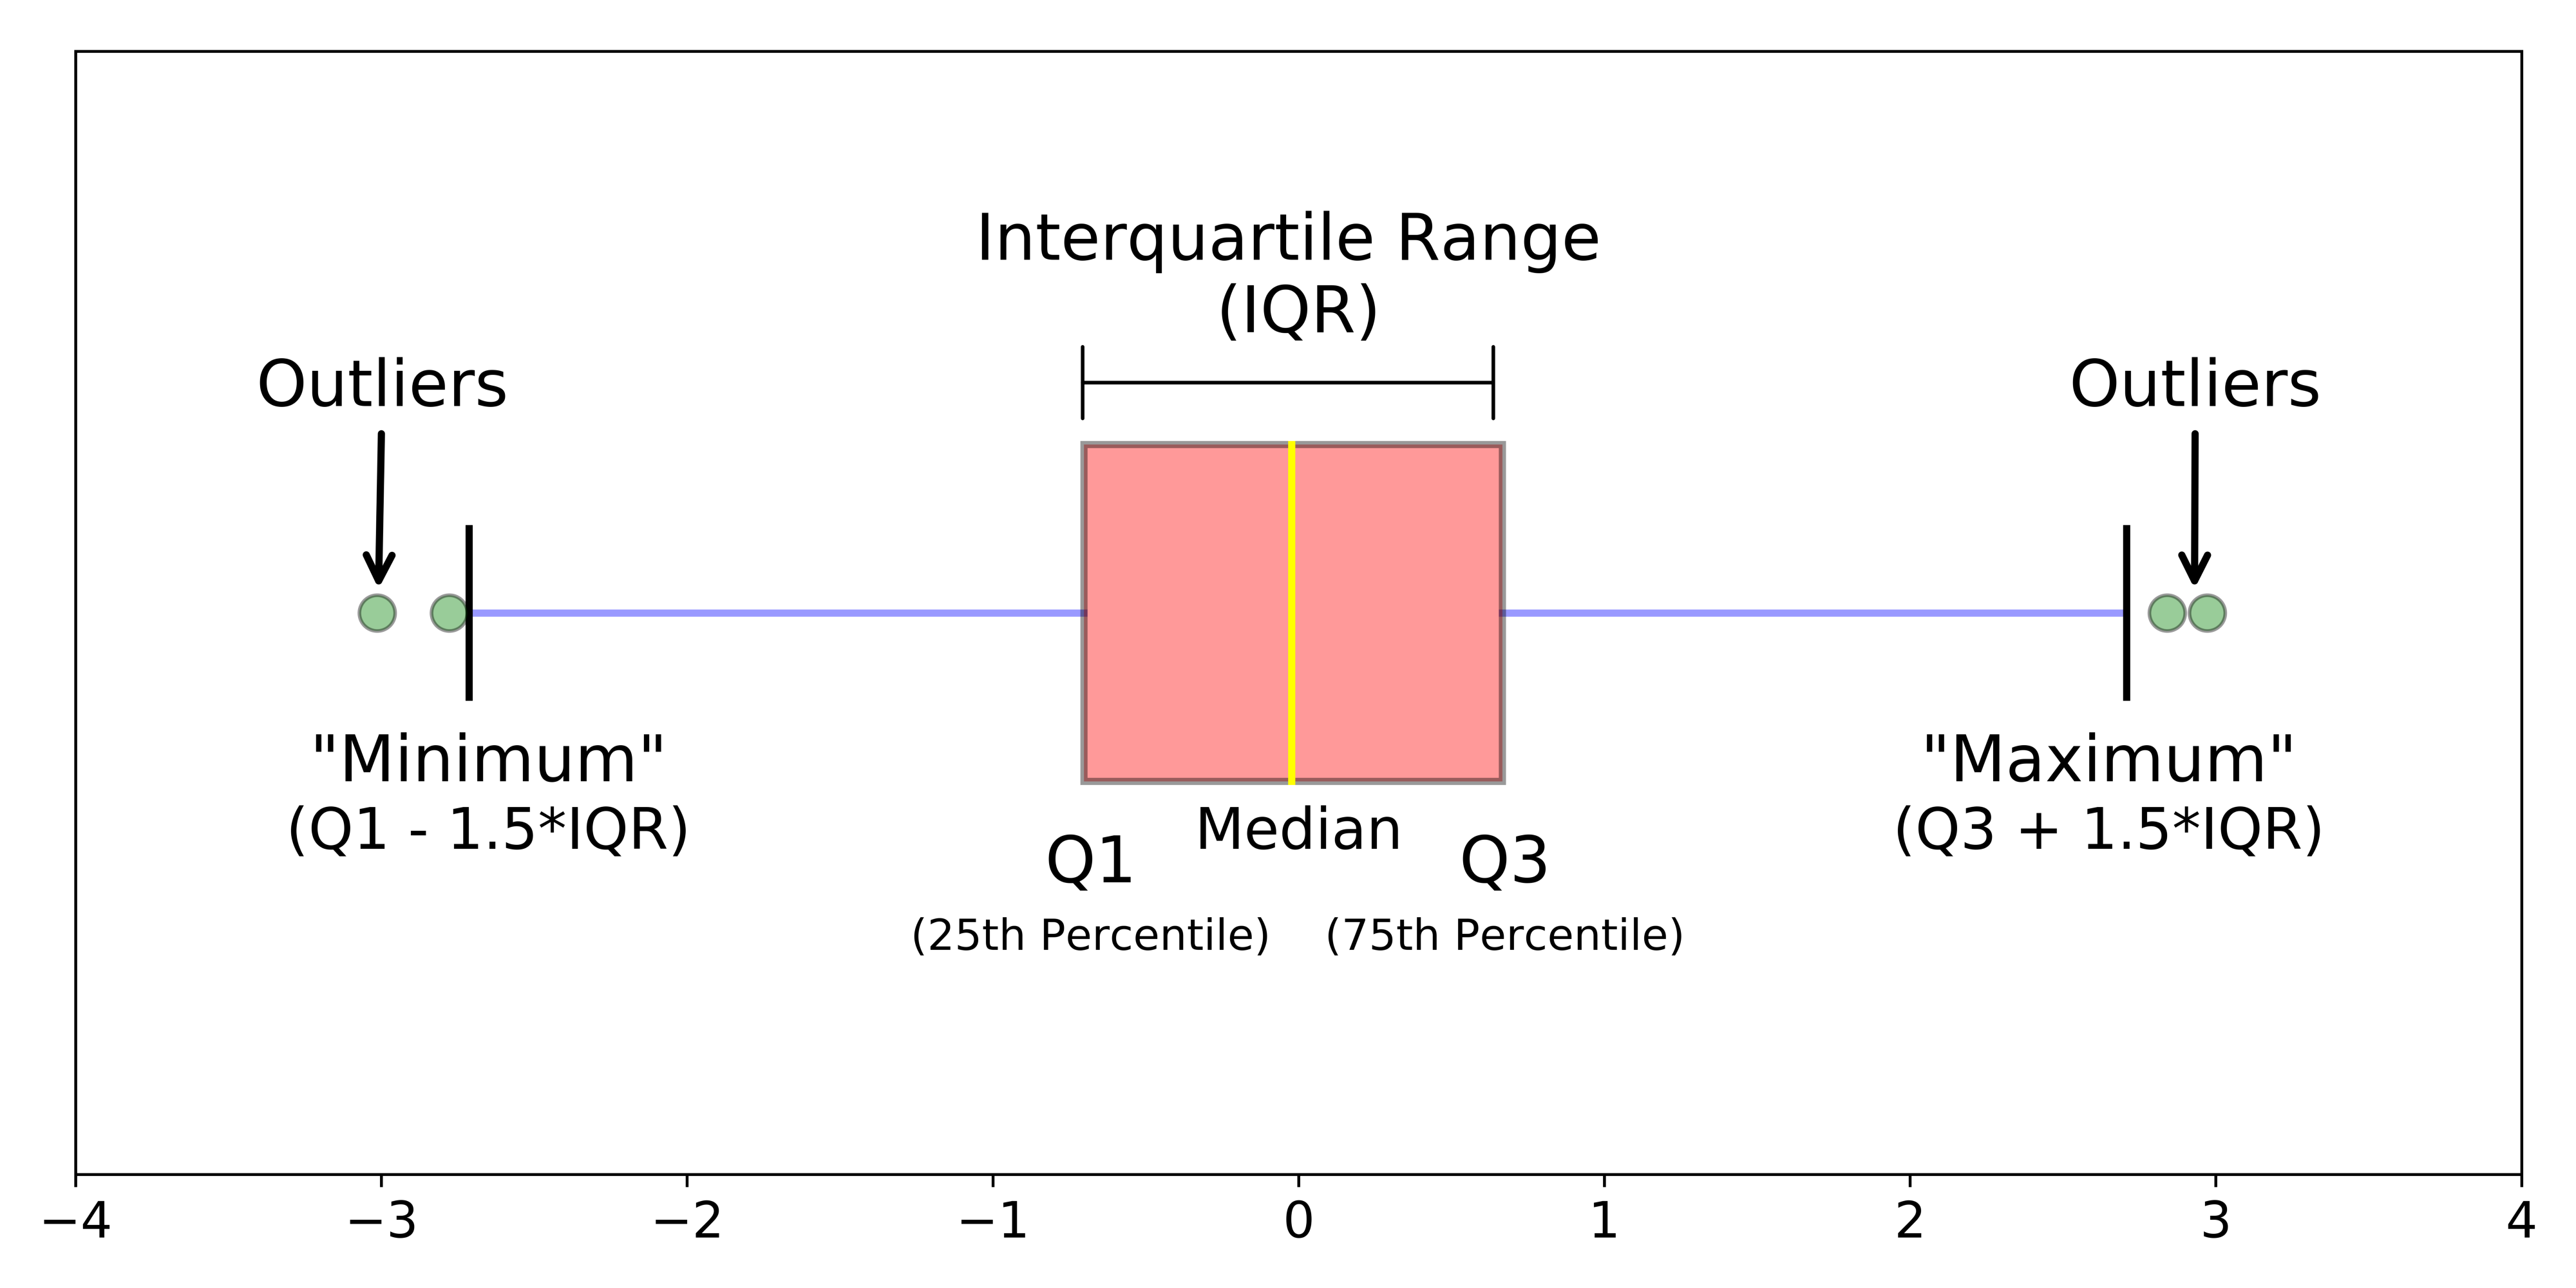

To make a `boxplot`, we can use `kind=box` in `plot` method invoked on a *pandas* series or dataframe.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.


Step 1: Get the subset of the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the `dataframe.describe()` method to view the percentiles.


In [61]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Step 2: Plot by passing in `kind='box'`.


## **Pandas**


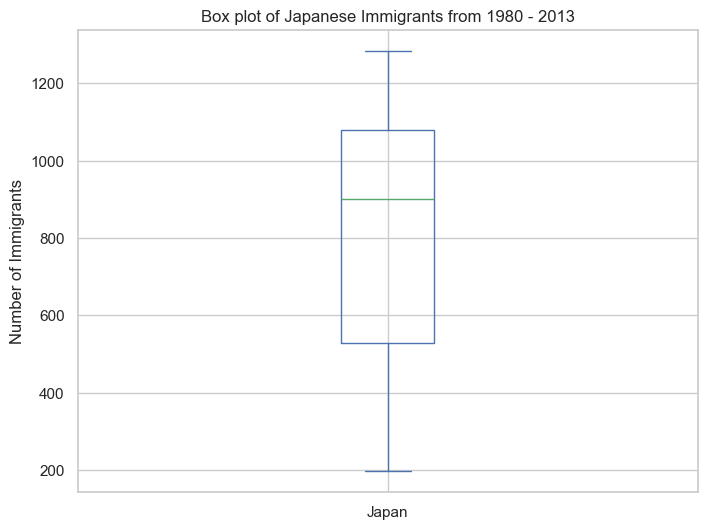

In [62]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

## **Matplotlib**


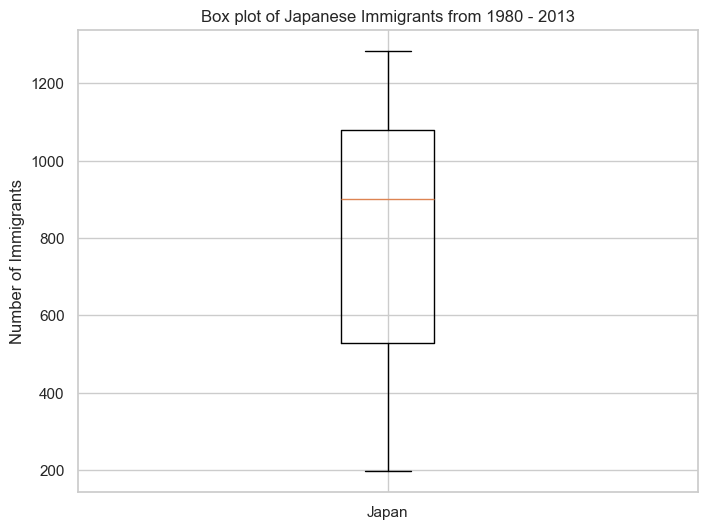

In [63]:
# Assuming 'df_japan' is a DataFrame with your data
plt.figure(figsize=(8, 6))

# Create the box plot
plt.boxplot(df_japan.values)

# Add titles and labels
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

# Set x-ticks to match the DataFrame's index
plt.xticks([1], df_japan.columns)

# Show the plot
plt.show()

## **Seaborn**


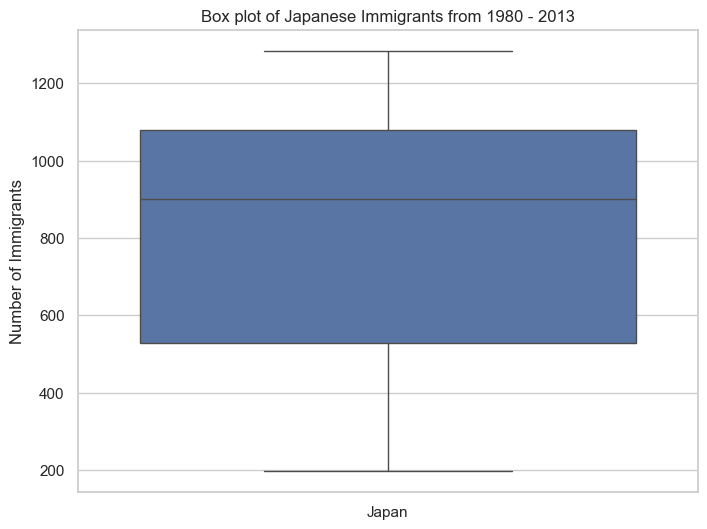

In [64]:
# Assuming 'df_japan' is a DataFrame with your data
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Create the box plot
sns.boxplot(data=df_japan)

# Add titles and labels
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

# Show the plot
plt.show()

We can immediately make a few key observations from the plot above:

1.  The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).
2.  25% of the years for period 1980 - 2013 had an annual immigrant count of \~500 or fewer (First quartile).
3.  75% of the years for period 1980 - 2013 had an annual immigrant count of \~1100 or fewer (Third quartile).

We can view the actual numbers by calling the `describe()` method on the dataframe.


In [65]:
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


**Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width="500" align="center">


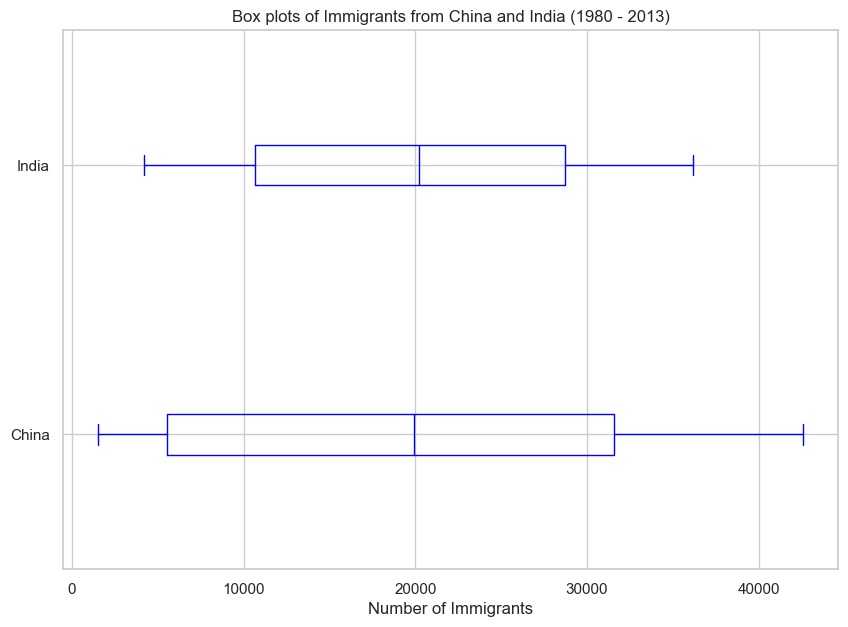

In [66]:
df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

We can then specify which subplot to place each plot by passing in the `ax` paramemter in `plot()` method as follows:


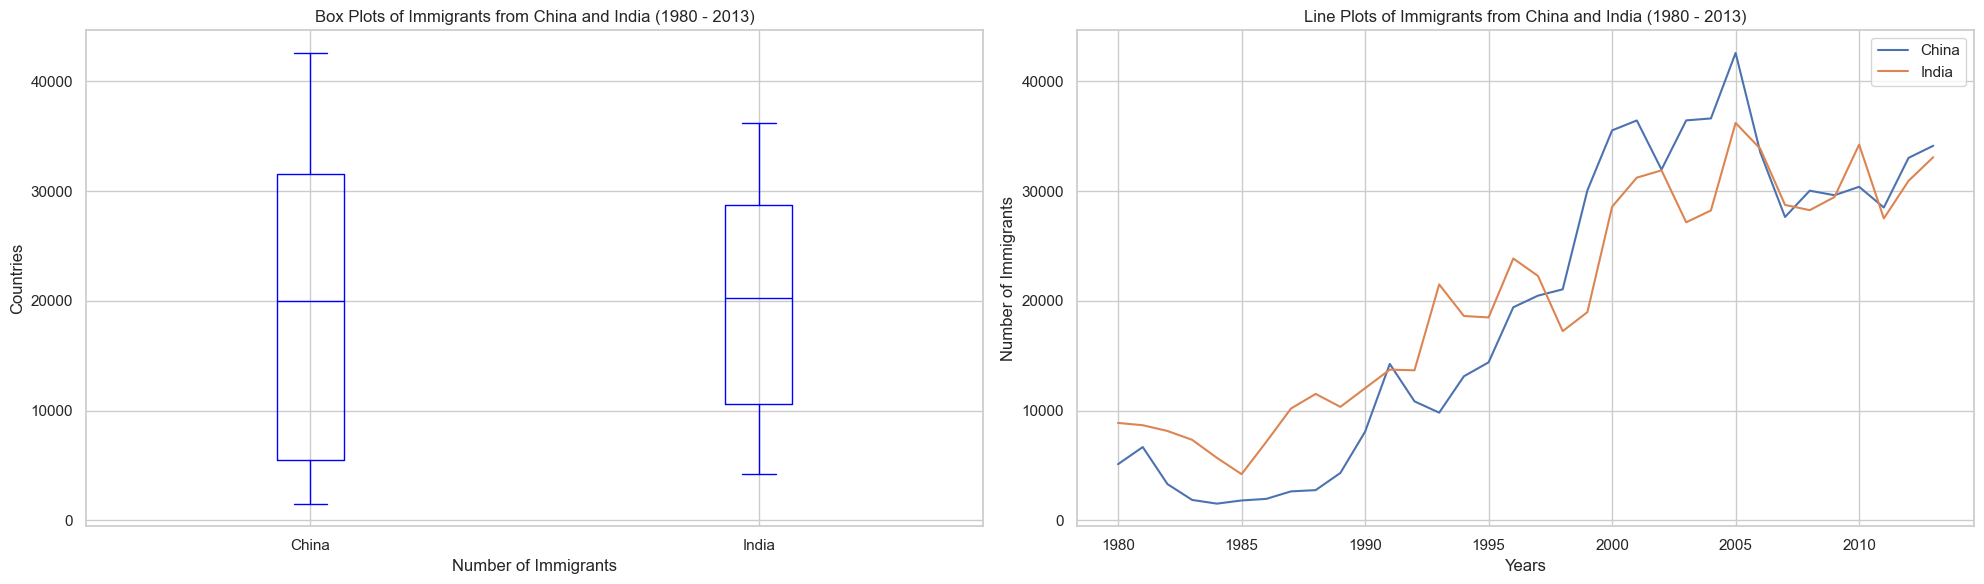

In [67]:

# Create figure
plt.figure(figsize=(20, 6))

# Subplot 1: Box plot
plt.subplot(1, 2, 1)
df_CI.plot(kind='box', color='blue', ax=plt.gca()) # plt.gca get the current Axes 
plt.title('Box Plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.ylabel('Countries')

# Subplot 2: Line plot
plt.subplot(1, 2, 2)
df_CI.plot(kind='line', ax=plt.gca())
plt.title('Line Plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# Show the plot
plt.tight_layout()  # automatically adjust subplot parameters to give specified padding.
plt.show()


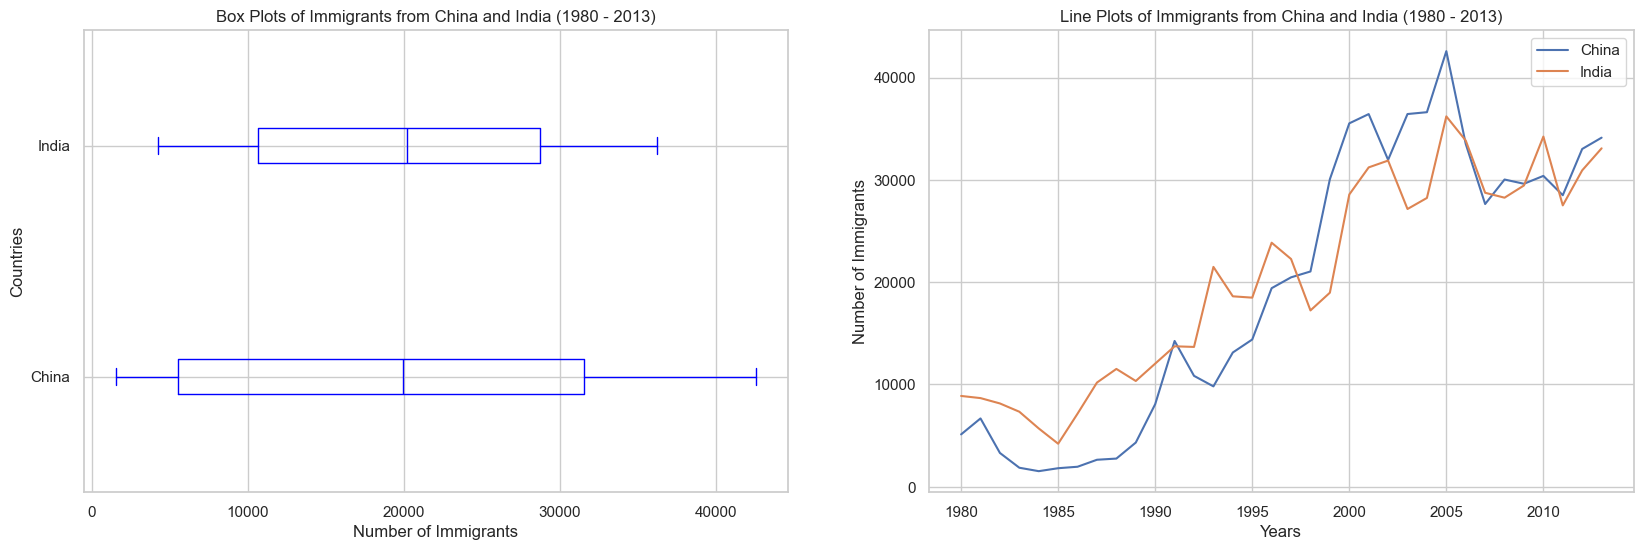

In [68]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

**Tip regarding subplot convention**

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that a 3-digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance,

```python
   subplot(211) == subplot(2, 1, 1)
```

produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).


# Scatter Plots <a id="10"></a>

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

Let's start by exploring the following:

Using a `scatter plot`, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.


Step 1: Get the dataset. Since we are expecting to use the relationship betewen `years` and `total population`, we will convert `years` to `int` type.


In [69]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Step 2: Plot the data. In `Matplotlib`, we can create a `scatter` plot set by passing in `kind='scatter'` as plot argument. We will also need to pass in `x` and `y` keywords to specify the columns that go on the x- and the y-axis.


## **Pandas**


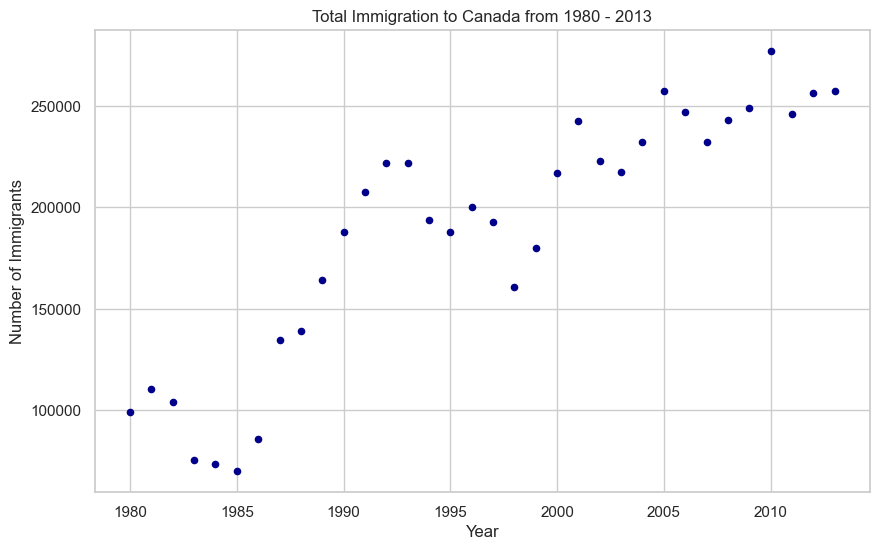

In [70]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

## **Matplotlib**


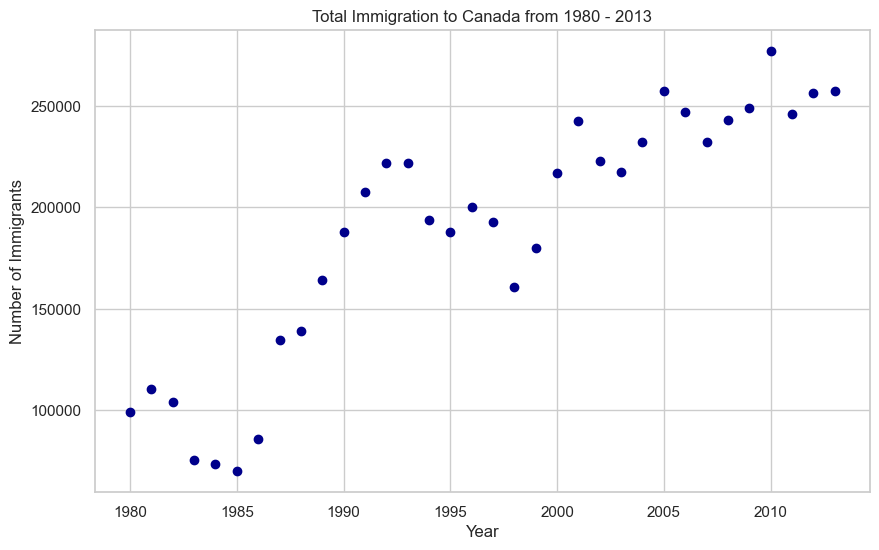

In [71]:
# Assuming 'df_tot' is a DataFrame with your data
plt.figure(figsize=(10, 6))

# Create the scatter plot
plt.scatter(df_tot['year'], df_tot['total'], color='darkblue')

# Add titles and labels
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Show the plot
plt.show()

## **Seaborn**


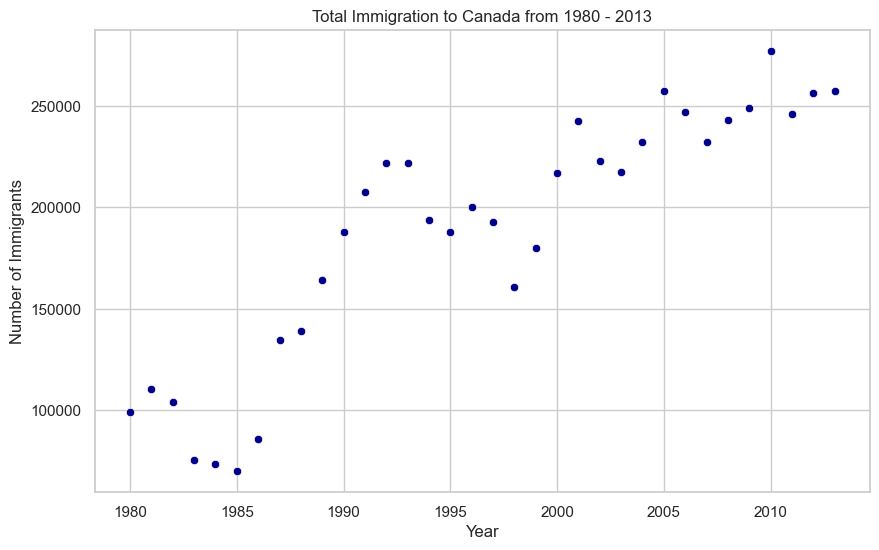

In [72]:
# Assuming 'df_tot' is a DataFrame with your data
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(data=df_tot, x='year', y='total', color='darkblue')

# Add titles and labels
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Show the plot
plt.show()

Notice how the scatter plot does not connect the data  points together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit).


So let's try to plot a linear line of best fit, and use it to  predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use **Numpy**'s `polyfit()` method by passing in the following:

*   `x`: x-coordinates of the data.
*   `y`: y-coordinates of the data.
*   `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.


In [73]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression `y= a * x + b`, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` with the the slope in position 0 and intercept in position 1.

Step 2: Plot the regression line on the `scatter plot`.


## **Pandas**


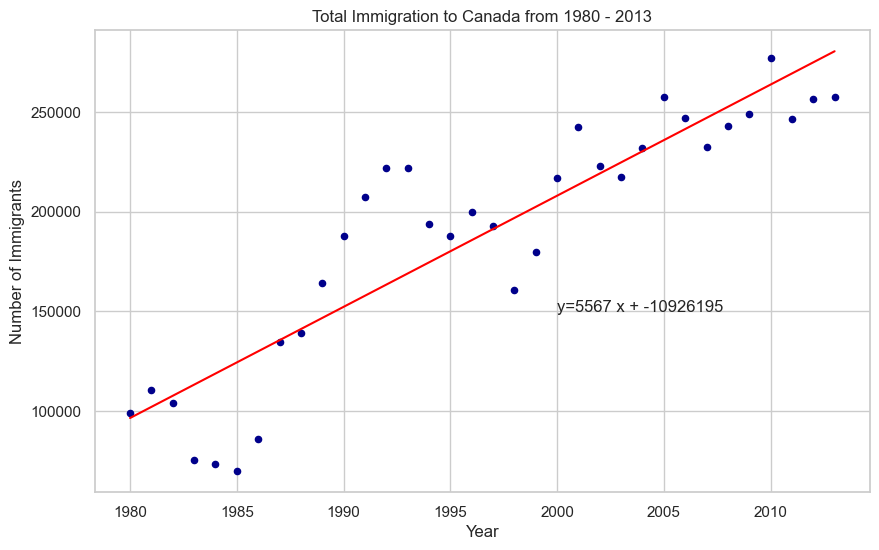

'No. Immigrants = 5567 * Year + -10926195'

In [74]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

## **Matplotlib**


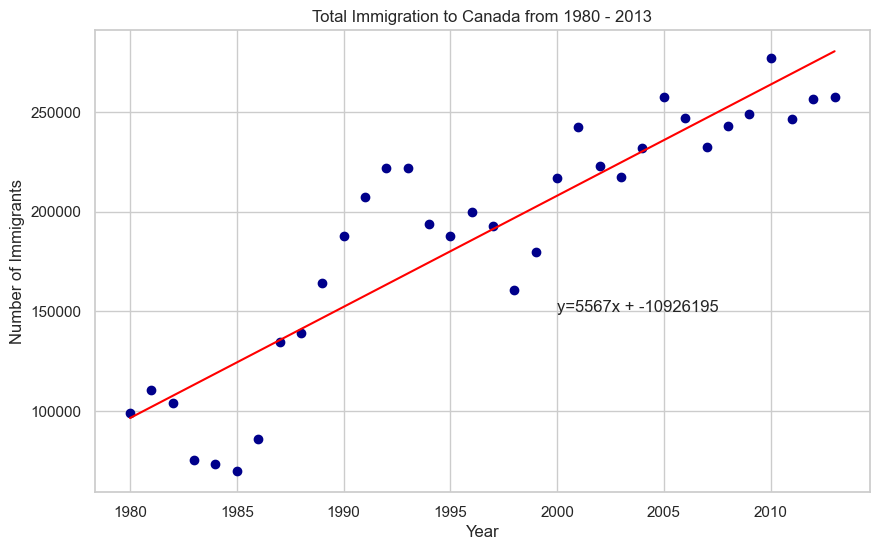

No. Immigrants = 5567 * Year + -10926195


In [75]:
# Assuming 'df_tot' is a DataFrame with your data
plt.figure(figsize=(10, 6))

# Create the scatter plot
plt.scatter(df_tot['year'], df_tot['total'], color='darkblue')

# Add titles and labels
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Calculate the line of best fit
fit = np.polyfit(df_tot['year'], df_tot['total'], 1)
x = np.array(df_tot['year'])
plt.plot(x, fit[0] * x + fit[1], color='red')

# Annotate the line of best fit
plt.annotate('y={0:.0f}x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

# Show the plot
plt.show()

# Print out the line of best fit
print('No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]))


## **Seaborn**


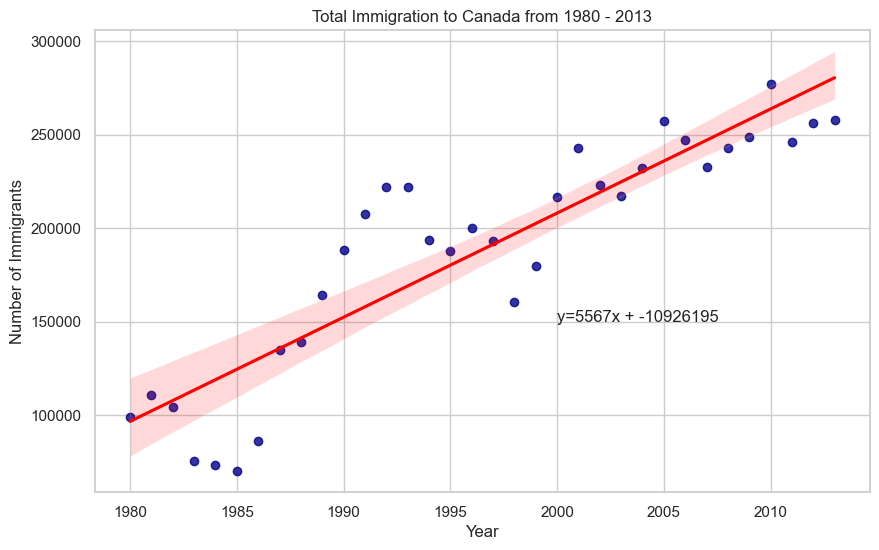

In [76]:
# Assuming 'df_tot' is a DataFrame with your data
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Create the scatter plot with a regression line using regplot
sns.regplot(data=df_tot, x='year', y='total', scatter_kws={'color': 'darkblue'}, line_kws={'color': 'red'})

# Add titles and labels
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Annotate the line of best fit
plt.annotate('y={0:.0f}x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

# Show the plot
plt.show()

# Count Plots <a id="10"></a>

countplot function to create a count plot, which is useful for visualizing the count of occurrences of categorical data.


In [77]:
df_can['Region'].nunique()

22

## **Seaborn**


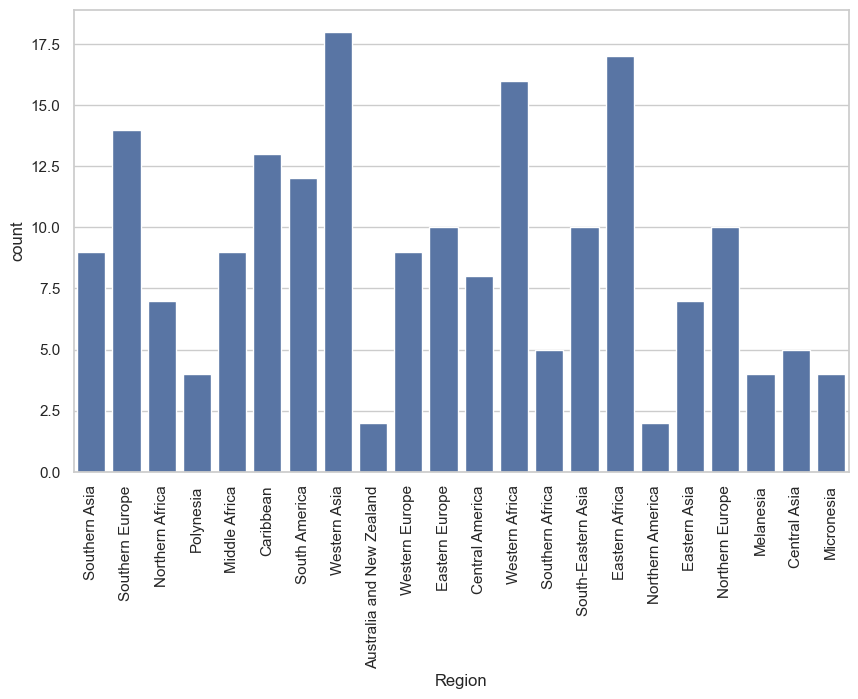

In [78]:
# Assuming 'df_tot' is a DataFrame with your data
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='Region',data=df_can)
plt.xticks(rotation=90)
plt.show()

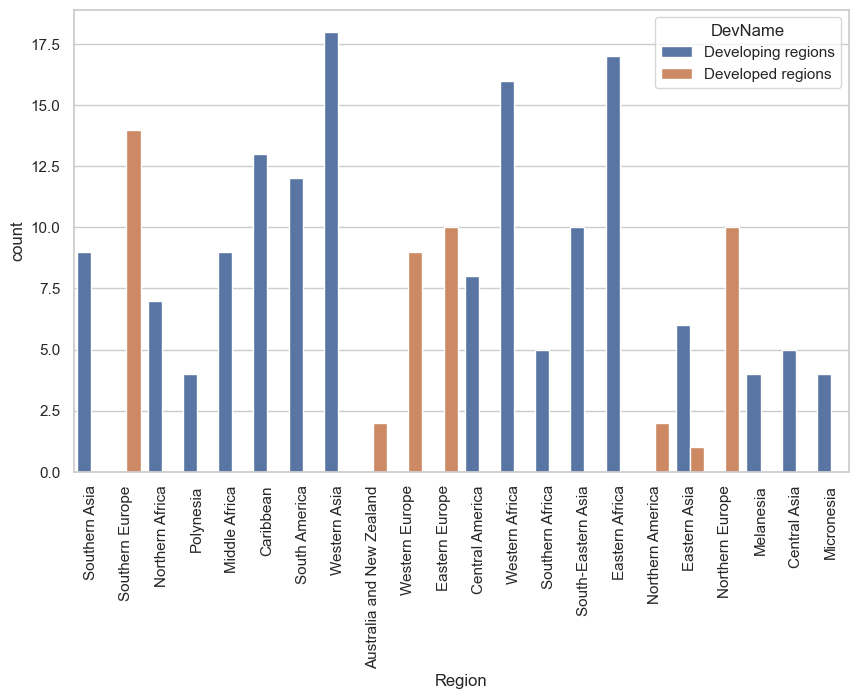

In [79]:
# Assuming 'df_tot' is a DataFrame with your data
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='Region',hue='DevName',data=df_can)
plt.xticks(rotation=90)
plt.show()

# Bar Plots <a id="10"></a>

barplot function to create a count plot, which is useful for visualizing the count of occurrences of categorical data.

In [80]:
y=df_can['Region'].value_counts()
y

Region
Western Asia                 18
Eastern Africa               17
Western Africa               16
Southern Europe              14
Caribbean                    13
South America                12
Northern Europe              10
South-Eastern Asia           10
Eastern Europe               10
Southern Asia                 9
Middle Africa                 9
Western Europe                9
Central America               8
Eastern Asia                  7
Northern Africa               7
Southern Africa               5
Central Asia                  5
Polynesia                     4
Melanesia                     4
Micronesia                    4
Australia and New Zealand     2
Northern America              2
Name: count, dtype: int64

In [81]:
y.values

array([18, 17, 16, 14, 13, 12, 10, 10, 10,  9,  9,  9,  8,  7,  7,  5,  5,
        4,  4,  4,  2,  2], dtype=int64)

## **Pandas**


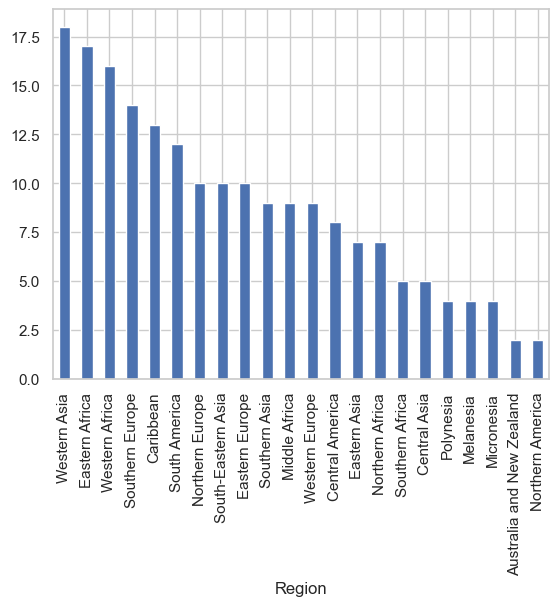

In [82]:
sns.set_color_codes("muted")
y.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

## **Matplotlib**


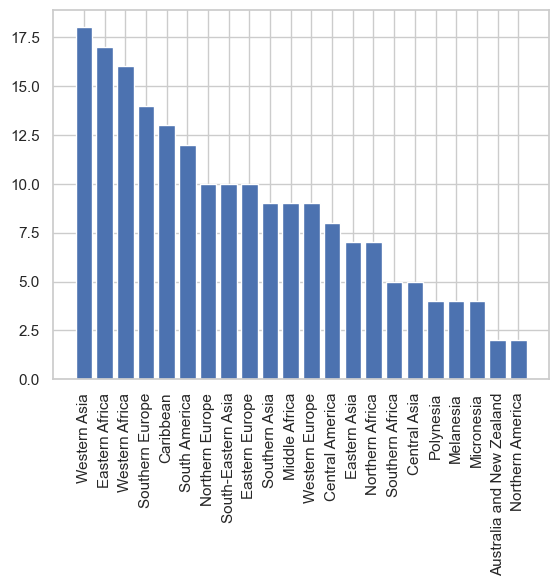

In [83]:
plt.bar(x=y.index, height=y.values)
plt.xticks(rotation=90)
plt.show()

## **Seaborn**


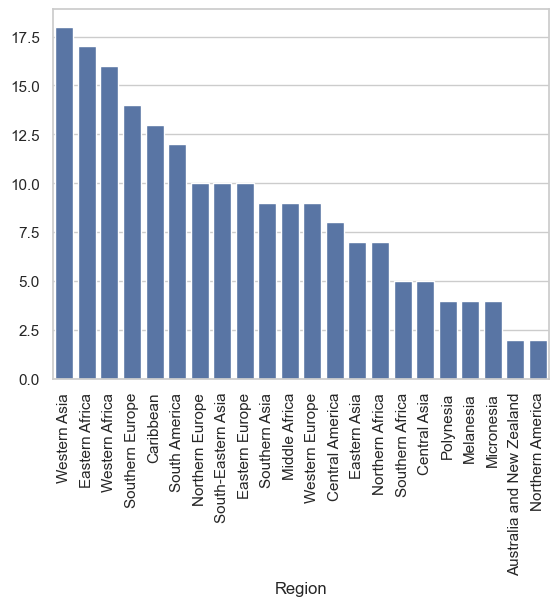

In [84]:
sns.set_color_codes("muted")
sns.barplot(x=y.index,y=y.values)
plt.xticks(rotation=90)
plt.show()

## **Seaborn**


In [85]:
df_corr= df_can.select_dtypes(include='number')
df_corr =df_corr.iloc[:,-5:]

In [86]:
df_corr.columns

Index(['2010', '2011', '2012', '2013', 'Total'], dtype='object')

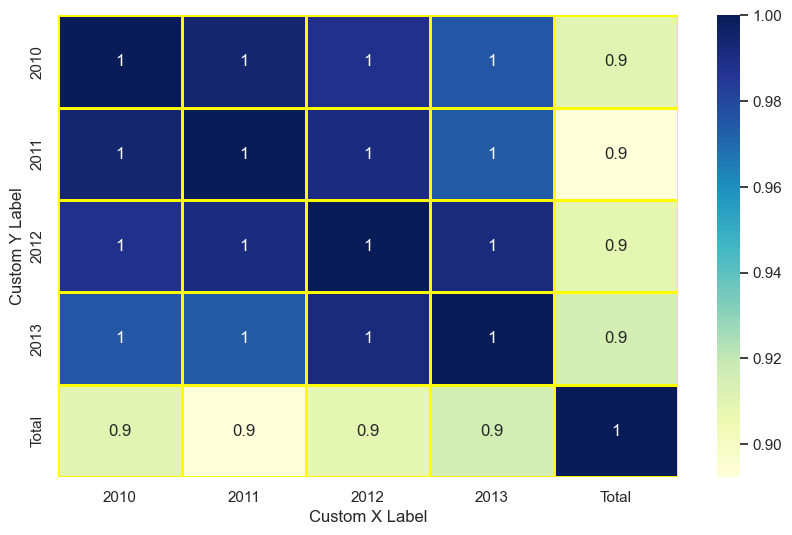

In [87]:
# Setting the parameter values
annot = True

# setting the parameter values
linewidths = 1
linecolor = "yellow"

plt.figure(figsize=(10, 6))
# Plotting the heatmap
ax = sns.heatmap(df_corr.corr(), annot=annot, fmt="0.1g", cmap="YlGnBu",linewidths=linewidths,
                linecolor=linecolor)

# Customizing x-label and y-label
ax.set_xticklabels(df_corr.columns)  # Replace with your desired x-labels
ax.set_yticklabels(df_corr.columns)  # Replace with your desired y-labels


# Customizing x-label and y-label
ax.set_xlabel("Custom X Label")
ax.set_ylabel("Custom Y Label")

# Displaying the plotted heatmap
plt.show()


# Great Job!